In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [120]:
'''
Testy NaN i zawartosci pliku z danymi pierwszych lat BTC z cryptocompare.
Finalnie zapis dobrych dancyh do btc_ok_2010_2017.pck
'''

'\nTesty NaN i zawartosci pliku z danymi pierwszych lat BTC z cryptocompare.\nFinalnie zapis dobrych dancyh do btc_ok_2010_2017.pck\n'

In [121]:
# LOAD DATA GATHERED FROM CRYPTOCOMPARE
df = pd.read_pickle('btc_2010_2017_.pck')
df.head(3)

,0
2010-07-18,0.04951
2010-07-26,0.05050
2010-07-25,0.05454


In [122]:
# GENERATE DATE_RANGE
date_range = pd.date_range(start='18/07/2010', end='17/12/2017')

# Dictionary from ccompare
cc = dict(df[0])

BTC_PRC_DATA = {}
for d in date_range:
    btc_date = str(d.date())
    if btc_date in cc.keys():
        BTC_PRC_DATA[btc_date] = cc[btc_date]
    else:
        BTC_PRC_DATA[btc_date] = np.nan

# Now BTC_PRC_DATA is a dict with all dates and we not sure if has any empty spaces (np.nan)
# Store BTC_PRC_DATA in datafram
bdf = pd.DataFrame([BTC_PRC_DATA]).T
bdf.columns = ['close']

# Check for nan
how_many_nan = bdf.isna().sum().sum()

print(f'Bitcoin hist. Len:{len(bdf)}, NaN_Lines:{how_many_nan}')
print(f'Dates from {bdf.index.min()} to {bdf.index.max()}')

Bitcoin hist. Len:2710, NaN_Lines:0
Dates from 2010-07-18 to 2017-12-17


In [123]:
# Check for nan

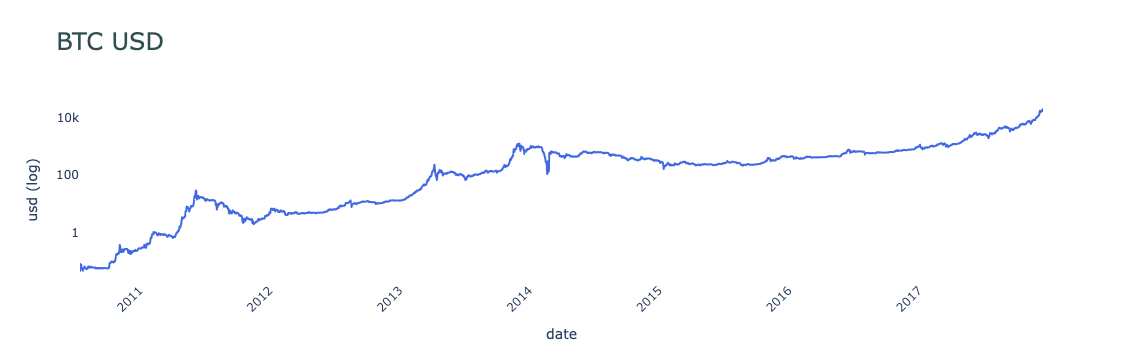

In [124]:
# Tworzenie wykresu liniowego
fig = px.line(bdf, x=bdf.index, y='close', title='BTC USD', labels={'close': 'BtcUsd', 'index': 'Date'})
fig.update_xaxes(title_text='Date')
fig.update_yaxes(title_text='BtcUsd')

fig.update_yaxes(type='log')

# Dostosowanie stylu wykresu
fig.update_traces(line=dict(color='royalblue', width=2))  # Kolor linii i grubość
fig.update_layout(title_font=dict(size=24, color='darkslategray'),  # Tytuł wykresu
                  xaxis_title=dict(text='date', font=dict(size=14)),
                  yaxis_title=dict(text='usd (log)', font=dict(size=14)),
                  plot_bgcolor='rgba(255, 255, 255, 0.7)',  # Tło wykresu
                  xaxis_tickangle=-45)  # Kąt nachylenia etykiet osi X

fig.show()


In [125]:
bdf.isna().sum().sum()

0

In [126]:
bdf.to_pickle('btc_ok_2010_2017.pck')